# Logistic Regression

1)  We consider a binary classification problem and implement logistic regression using ```sklearn```.

2) We consider the same binary classification problem as above and we code logistic regression model from scratch as a single neuron with batch gradient descent. 

3) We consider a multiclass classfication problem with logistic regression using ```sklearn```.

---

## 1) Binary logistic regression using sklearn

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html

import seaborn as sns
from mlxtend.plotting import plot_decision_regions

In [5]:
np.e

2.718281828459045

In [6]:
def sigmoid(z):
    return (1/(1+np.e**(-z)))

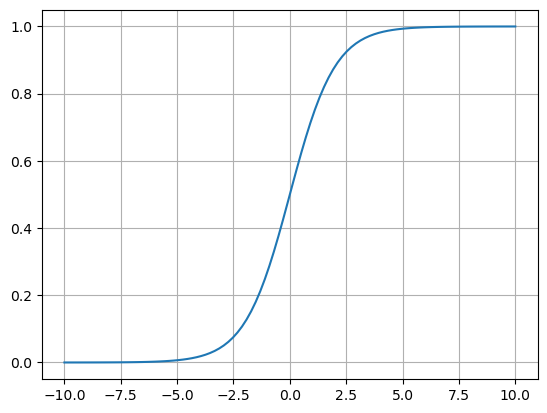

In [7]:
z = np.linspace(-10, 10, 100)

plt.plot(z, sigmoid(z))
plt.grid();

In [8]:
df = pd.read_csv('insurancedata.csv')
df.head()

,age,insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


In [9]:
df.shape

(27, 2)

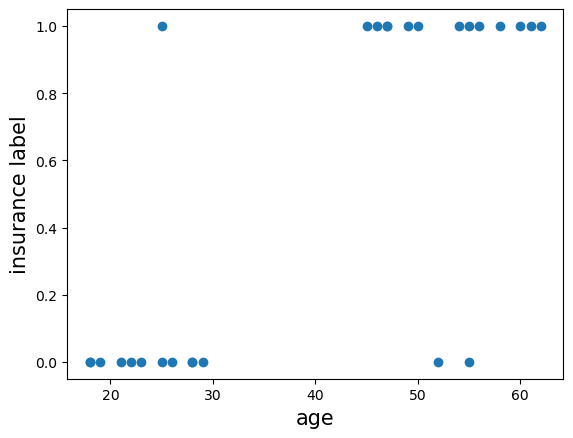

In [10]:
plt.scatter(df.age, df.insurance)
plt.xlabel('age', fontsize=15)
plt.ylabel('insurance label', fontsize=15);

In [11]:
X = df[['age']]
y = df['insurance']

log_reg = LogisticRegression()

log_reg.fit(X, y)

LogisticRegression()

In [12]:
log_reg.predict_proba([[65], [21]])

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.02781947, 0.97218053],
       [0.92860822, 0.07139178]])

In [13]:
import warnings
warnings.filterwarnings("ignore")

In [14]:
log_reg.predict([[65],[21]])

array([1, 0])

In [15]:
b = log_reg.intercept_
b

array([-5.48608377])

In [16]:
w = log_reg.coef_
w

array([[0.13907522]])

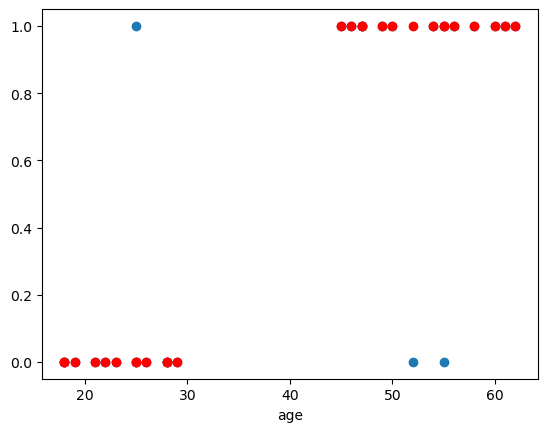

In [17]:
plt.scatter(X, y)

y_pred = log_reg.predict(X)

plt.scatter(X, y_pred, color = "red")

plt.xlabel('age');

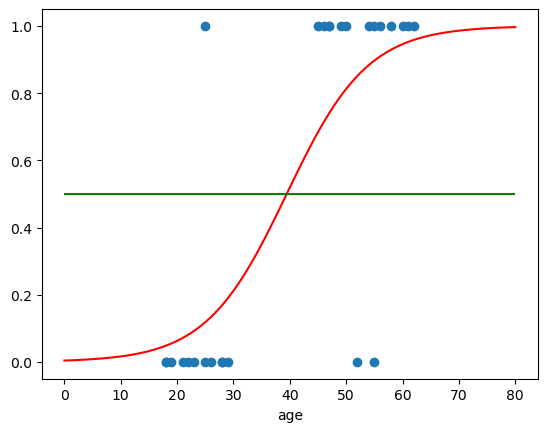

In [18]:
plt.scatter(X, y)

x_value = np.linspace(0, 80, 100)

def p(x, b, w):
    return 1/(1+ np.e**(-(w*x+b)))

plt.plot(x_value, p(x_value, b, w[0]), color="red")

plt.xlabel("age")

plt.hlines(xmin=0, xmax=80, y=0.5, color='green');

---

**Question:** What is the threshold age for making predictions?

---

In [20]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y, y_pred)

array([[11,  2],
       [ 1, 13]])

In [21]:
(11+13)/(11+13+2+1)

0.8888888888888888

In [22]:
log_reg.score(X, y)

0.8888888888888888

In [23]:
from sklearn.metrics import classification_report

print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88        13
           1       0.87      0.93      0.90        14

    accuracy                           0.89        27
   macro avg       0.89      0.89      0.89        27
weighted avg       0.89      0.89      0.89        27



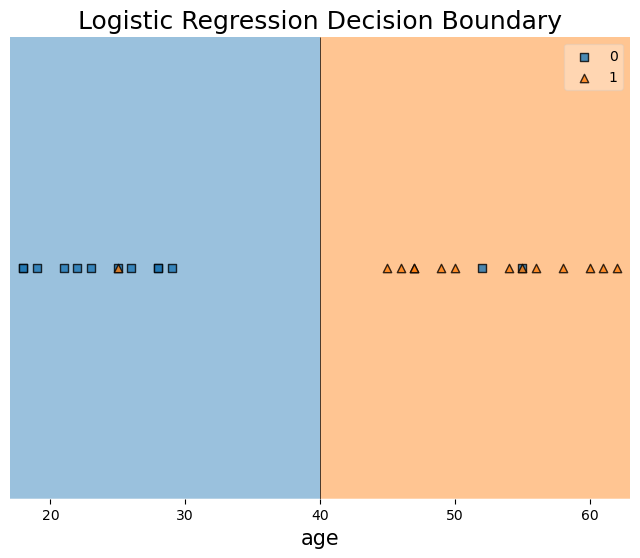

In [24]:
plt.figure(figsize = (8, 6))
plot_decision_regions(X.to_numpy(), y.to_numpy(), clf = log_reg)
plt.title("Logistic Regression Decision Boundary", fontsize = 18)
plt.xlabel("age", fontsize = 15);

---

## 2) Binary logistic regression from scratch

---

Consider dataset $D = \{ (x^{(1)}, y^{(1)}), \ldots, (x^{(n)}, y^{(n)})\}$ where $x^{(i)} \in \mathbb R$ and $y^{(i)} \in 
\{0,1\}$.

Linear logistic regression model is given by $h(x) = \sigma(wx + b)$, where 
$$
    \sigma(z) = \frac{1}{1+e^{-z}}
$$
is the sigmoid function.

We want to find parameters $w$ and $b$ that minimize the binary cross entropy loss: 

$$
L(w, b; D) = - \frac{1}{n}\sum_{i=1}^n  \left( y^{(i)} \log \hat y^{(i)} + (1-y^{(i)}) \log (1-\hat y^{(i)})\right)
$$

Since $L(w, b; D)$ is a differentiable function of both $w$ and $b$, and it is also convex, we can try to solve this minimization problem by applying the gradient descent algorithm:

$$
w_{new} = w - \alpha \frac{\partial L}{\partial w}(w, b; D)
$$

$$
b_{new} = b - \alpha \frac{\partial L}{\partial b}(w, b; D)
$$

where $\alpha$ is a learning rate hyperparameter and the derivaties are given by 

$$
\frac{\partial L}{\partial w}(w, b; D) = \frac{1}{n}\sum_{i=1}^{n}\Big(\hat{y}^{(i)} - y^{(i)}\Big)x^{(i)}
$$

$$
\frac{\partial L}{\partial b}(w, b; D) = \frac{1}{n}\sum_{i=1}^{n}\Big(\hat{y}^{(i)} - y^{(i)}\Big)
$$

---

In [27]:
class MyLogReg(object):
    """
    A class used to represent a single artificial neuron modeling logistic regression. 

    ...

    Attributes
    ----------
    activation_function : function
        The activation function applied to the preactivation linear combination.
    
    loss_function : function
        The loss/cost function used to measure model performance.

    w : numpy.ndarray
        The weights and bias of the single neuron. The last entry being the bias. 
        This attribute is created when the fit method is called.

    errors : list
        A list containing the binary cross entropy error computed after each epoch 
        of batch gradient descent.

    Methods
    -------
    fit(self, X, y, alpha = 0.005, epochs = 50)
        Iterates the batch gradient descent algorithm 
        a total of epochs number of times with learning rate alpha. The data 
        used consists of a feature vector X and associated label y. 

    predict(self, X)
        Uses the weights and bias, the feature vector X, and the 
        activation_function to make a y_hat prediction on each data instance. 
    """
    
    def __init__(self, activation_function, loss_function):
        self.activation_function = activation_function
        self.loss_function = loss_function

    def fit(self, X, y, alpha = 0.005, epochs = 50):
   
        self.w = np.random.rand(1 + X.shape[1])
        self.errors = []
        n = X.shape[0]

        for _ in range(epochs):
            errors = 0
            sum_1 = 0
            sum_2 = 0
            for xi, target in zip(X, y):    
                sum_1 += (self.predict(xi) - target)*xi
                sum_2 += (self.predict(xi) - target)
                errors +=self.loss_function(self.predict(xi), target)
            self.w[:-1] -= alpha*sum_1/n
            self.w[-1] -= alpha*sum_2/n
            self.errors.append(errors/n)
        return self

    def predict(self, X):
        preactivation = np.dot(X, self.w[:-1]) + self.w[-1]
        return self.activation_function(preactivation)


    def plot_loss_function(self):
        fig, axs = plt.subplots(figsize = (8, 6))
        axs.plot(range(1, len(self.errors) + 1), 
                self.errors)
        axs.set_xlabel("Epochs", fontsize = 15)
        axs.set_ylabel("Binary cross entropy loss", fontsize = 15)
        axs.set_title("Loss Calculated During Training", fontsize = 18)
        plt.show()

    def plot_decision_boundary(self, X, y):
        plt.figure(figsize = (8, 6))
        plot_decision_regions(X, y, clf = self)
        plt.title("Logistic Regression Decision Boundary", fontsize = 18)
        plt.xlabel("age", fontsize = 15)
        plt.show()

In [28]:
def binary_cross_entropy_loss(y_hat, y):
    return -(y*np.log(y_hat) + (1-y)*np.log(1-y_hat))

In [29]:
X = df[['age']].to_numpy()
X

array([[22],
       [25],
       [47],
       [52],
       [46],
       [56],
       [55],
       [60],
       [62],
       [61],
       [18],
       [28],
       [28],
       [29],
       [49],
       [55],
       [25],
       [58],
       [19],
       [18],
       [21],
       [26],
       [47],
       [45],
       [50],
       [54],
       [23]])

In [30]:
y = df['insurance'].to_numpy()
y

array([0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0])

In [31]:
model = MyLogReg(sigmoid, binary_cross_entropy_loss)

model.fit(X, y, alpha = 0.005, epochs = 3500)

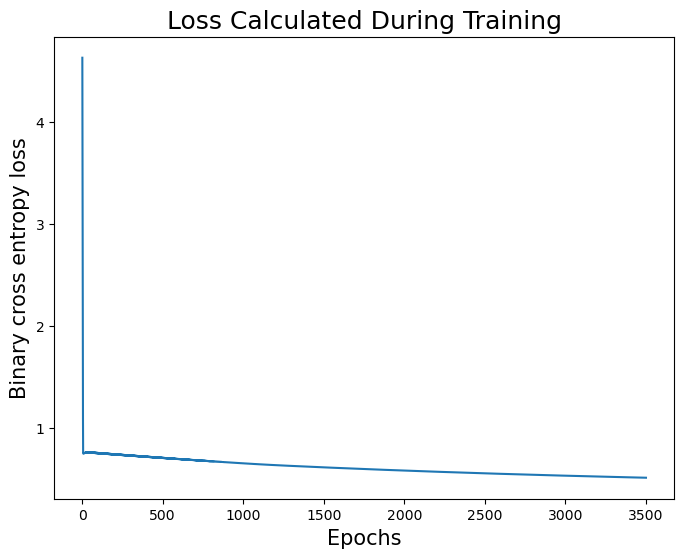

In [32]:
model.plot_loss_function();

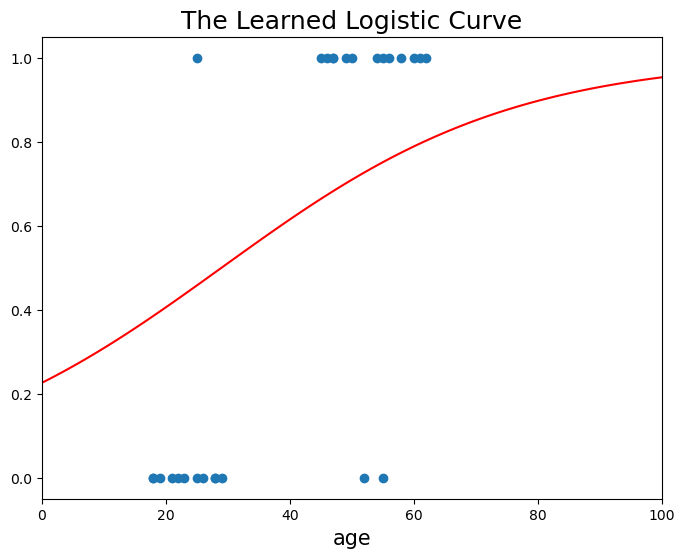

In [33]:
plt.figure(figsize = (8, 6))
plt.xlim((0, 100))

plt.scatter(df.age, df.insurance)

domain = np.linspace(0, 100, 100)
plt.plot(domain, model.predict(domain.reshape(-1, 1)), color="red")
plt.xlabel("age", fontsize = 15)
plt.title("The Learned Logistic Curve", fontsize = 18)
plt.show()

In [34]:
model.predict([[65]])

array([0.82202638])

In [35]:
print(np.rint(model.predict(X)) == y)

# round the predicted probability to the nearest interger to see what the predicted label is

[ True  True  True False  True  True False  True  True  True  True  True
  True False  True  True False  True  True  True  True  True  True  True
  True  True  True]


In [36]:
predicted_labels = (np.rint(model.predict(X)) == y).astype(int)
print(f"Accuracy = {sum(predicted_labels)/ len(y)}")

Accuracy = 0.8518518518518519


In [37]:
predicted_labels

array([1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1])

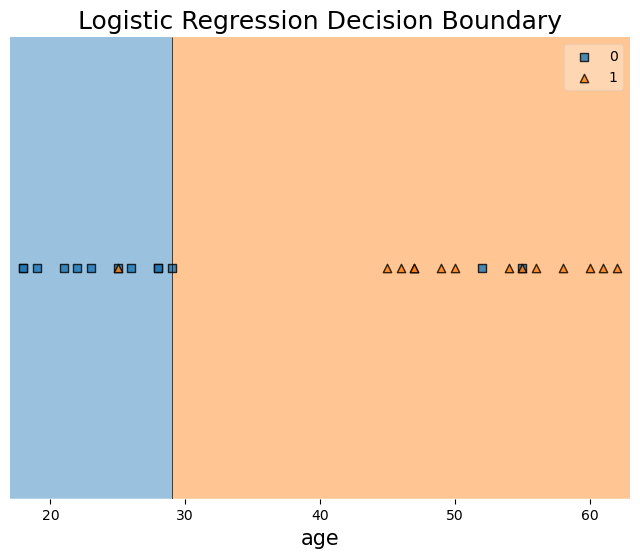

In [38]:
model.plot_decision_boundary(X, y)
plt.show()

---

**Note:** The decision boundary is different from the one found using sklearn because logistic regression class in sklearn usespecially regularization and minimizing techniques different from the simple batch gradient descent we defined. 

---

## 3) Multiclass logistic regression using sklearn

In [41]:
from sklearn.datasets import load_digits

digits = load_digits()

In [42]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [43]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [44]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

In [45]:
digits.data[25]

array([ 0.,  0., 12.,  8.,  8.,  7.,  0.,  0.,  0.,  3., 16., 16., 11.,
        7.,  0.,  0.,  0.,  2., 14.,  1.,  0.,  0.,  0.,  0.,  0.,  5.,
       14.,  5.,  0.,  0.,  0.,  0.,  0.,  2., 15., 16.,  9.,  0.,  0.,
        0.,  0.,  0.,  0.,  2., 16.,  2.,  0.,  0.,  0.,  0.,  4.,  8.,
       16.,  4.,  0.,  0.,  0.,  0., 11., 14.,  9.,  0.,  0.,  0.])

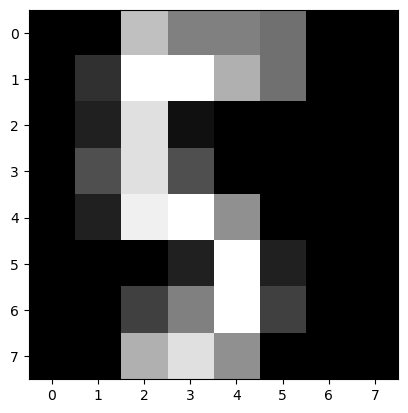

In [46]:
plt.gray() 
plt.imshow(digits.images[25]);

In [47]:
digits.target[25]

5

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2)

In [49]:
len(X_train)

1437

In [50]:
len(X_test)

360

In [51]:
model = LogisticRegression(max_iter=10_000)

model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [52]:
model.score(X_train, y_train)

1.0

In [53]:
model.score(X_test, y_test)

0.9638888888888889

In [54]:
y_predicted = model.predict(X_test)

In [55]:
y_predicted

array([3, 2, 8, 6, 7, 1, 0, 3, 0, 7, 6, 8, 6, 5, 4, 7, 6, 9, 2, 2, 6, 3,
       5, 0, 6, 1, 6, 6, 7, 3, 2, 2, 4, 6, 7, 1, 7, 6, 3, 8, 7, 9, 3, 7,
       5, 9, 7, 8, 8, 0, 3, 3, 9, 4, 0, 3, 3, 3, 1, 9, 0, 9, 5, 1, 3, 2,
       0, 0, 5, 8, 3, 1, 6, 6, 0, 7, 9, 1, 2, 8, 1, 9, 7, 4, 3, 1, 4, 0,
       3, 2, 3, 6, 9, 3, 5, 6, 0, 5, 8, 4, 1, 7, 2, 3, 0, 9, 1, 5, 5, 1,
       3, 7, 9, 2, 7, 4, 6, 3, 7, 0, 1, 3, 7, 1, 5, 5, 2, 8, 9, 8, 8, 7,
       4, 3, 7, 6, 4, 5, 1, 6, 2, 4, 2, 7, 4, 1, 2, 3, 3, 1, 6, 7, 8, 4,
       4, 5, 5, 6, 7, 5, 7, 5, 6, 5, 9, 9, 9, 9, 5, 1, 1, 1, 6, 8, 8, 7,
       0, 2, 5, 6, 6, 6, 9, 3, 3, 6, 3, 0, 5, 6, 2, 9, 5, 6, 6, 2, 7, 3,
       9, 7, 2, 2, 8, 0, 0, 5, 8, 9, 0, 4, 8, 4, 7, 9, 8, 7, 5, 1, 7, 7,
       7, 3, 2, 9, 5, 0, 2, 0, 2, 2, 5, 1, 2, 5, 0, 6, 3, 5, 2, 4, 7, 9,
       2, 8, 3, 5, 3, 9, 7, 9, 4, 6, 0, 9, 6, 5, 9, 0, 1, 7, 3, 5, 0, 2,
       3, 5, 5, 1, 8, 9, 8, 4, 7, 9, 4, 0, 8, 9, 3, 4, 5, 2, 8, 0, 3, 2,
       2, 4, 0, 9, 6, 2, 5, 5, 3, 7, 9, 1, 1, 1, 6,

In [56]:
cm = confusion_matrix(y_test, y_predicted)
cm

array([[32,  0,  0,  0,  1,  1,  0,  0,  0,  0],
       [ 0, 32,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 36,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 39,  0,  0,  0,  0,  1,  1],
       [ 0,  0,  0,  0, 26,  0,  0,  1,  0,  1],
       [ 0,  0,  0,  1,  1, 38,  1,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 39,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 40,  0,  0],
       [ 0,  0,  1,  0,  1,  0,  0,  0, 27,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 38]])

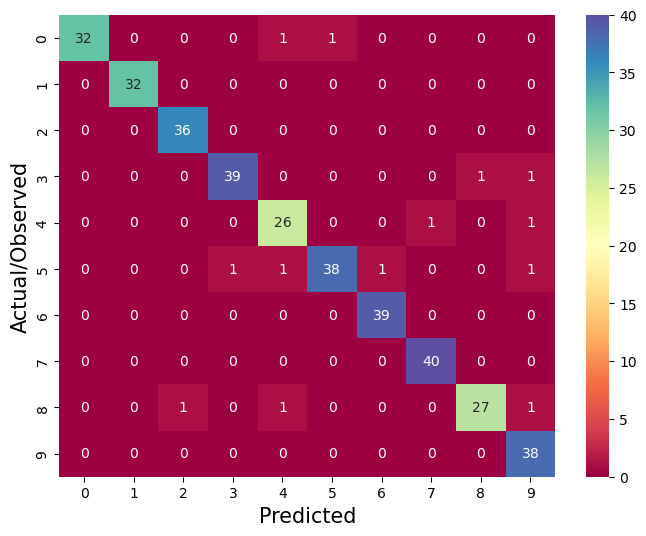

In [57]:
plt.figure(figsize = (8,6))

sns.heatmap(cm, 
            annot=True, 
            cmap="Spectral")
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual/Observed', fontsize=15);

In [58]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        34
           1       1.00      1.00      1.00        32
           2       0.97      1.00      0.99        36
           3       0.97      0.95      0.96        41
           4       0.90      0.93      0.91        28
           5       0.97      0.90      0.94        42
           6       0.97      1.00      0.99        39
           7       0.98      1.00      0.99        40
           8       0.96      0.90      0.93        30
           9       0.90      1.00      0.95        38

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



# Homework:

### Part 1:

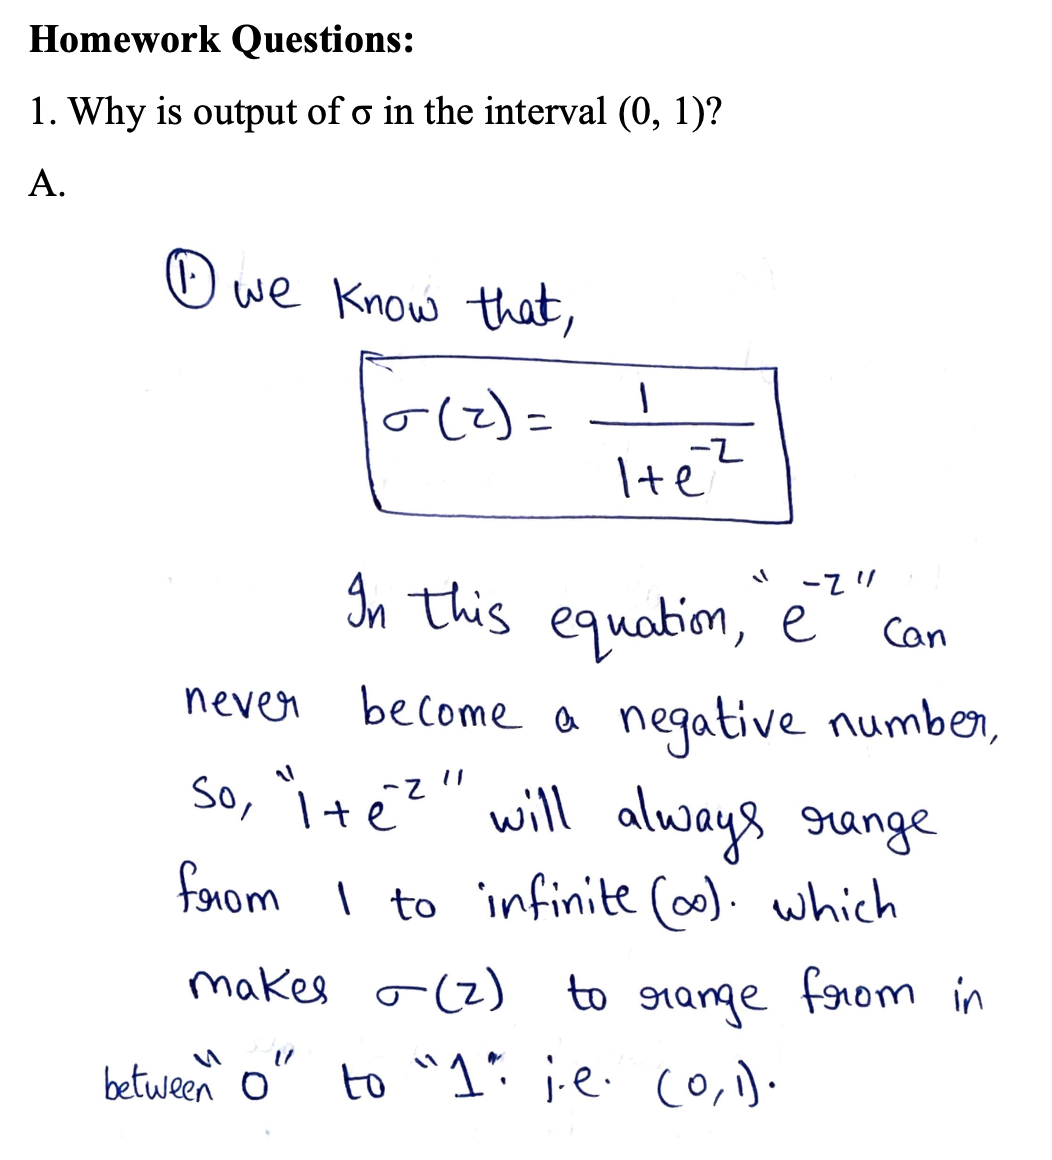

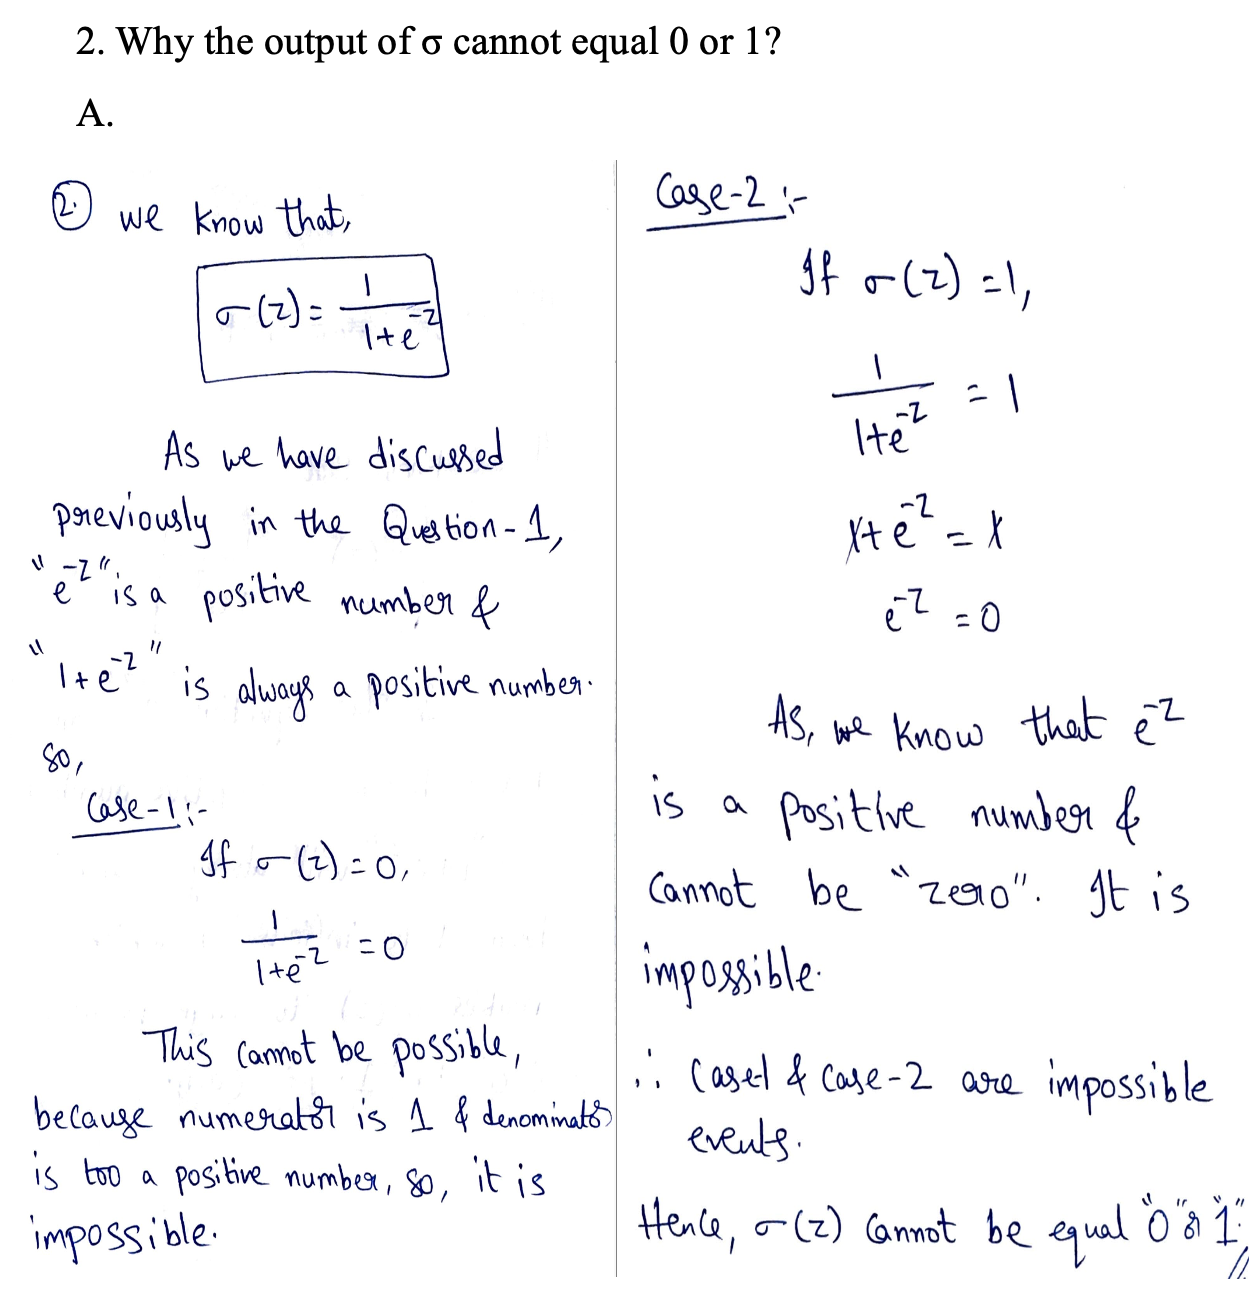

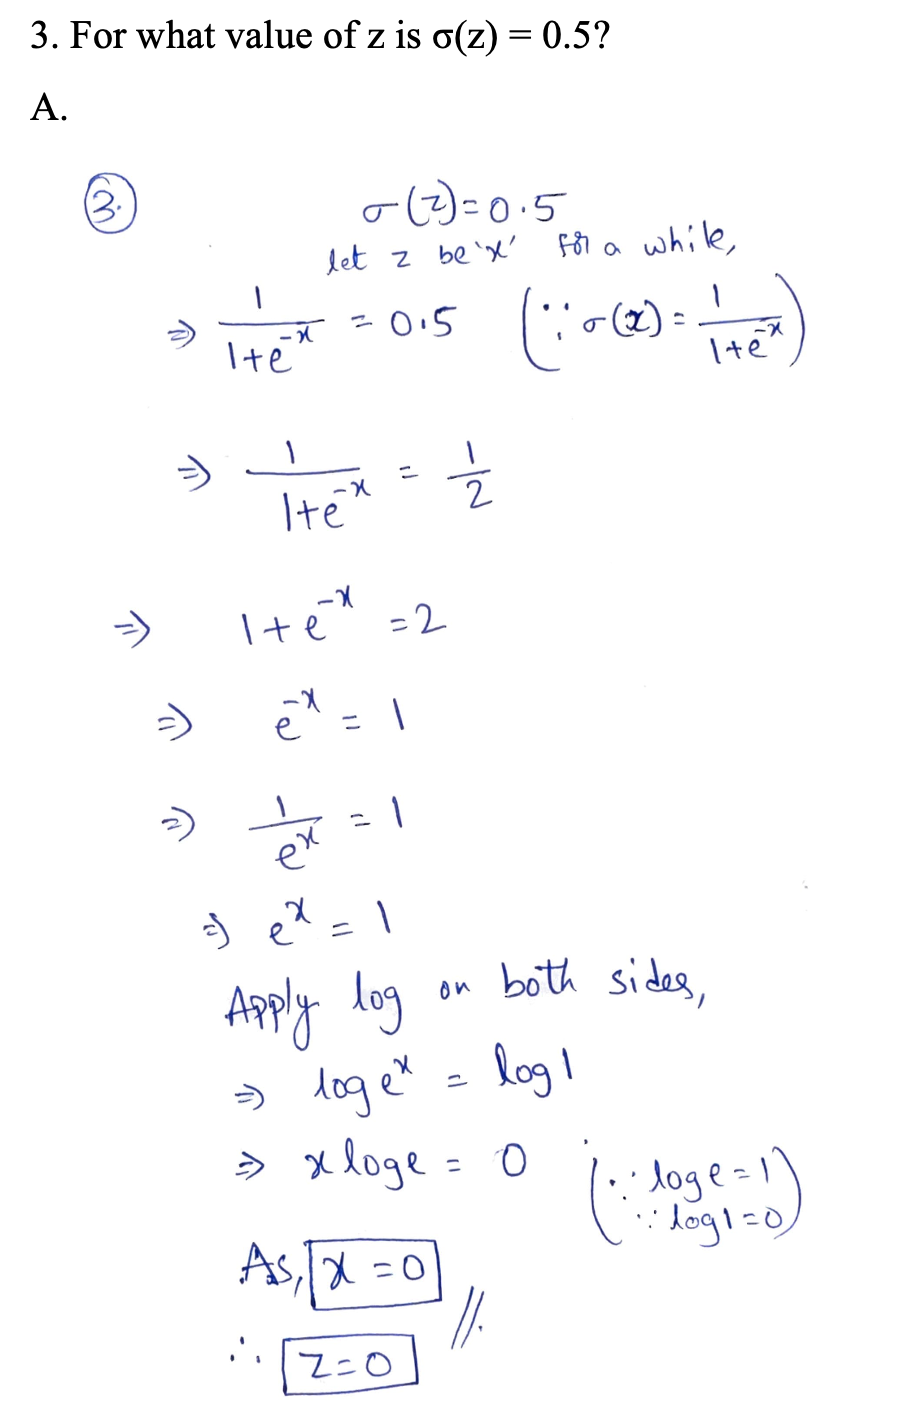

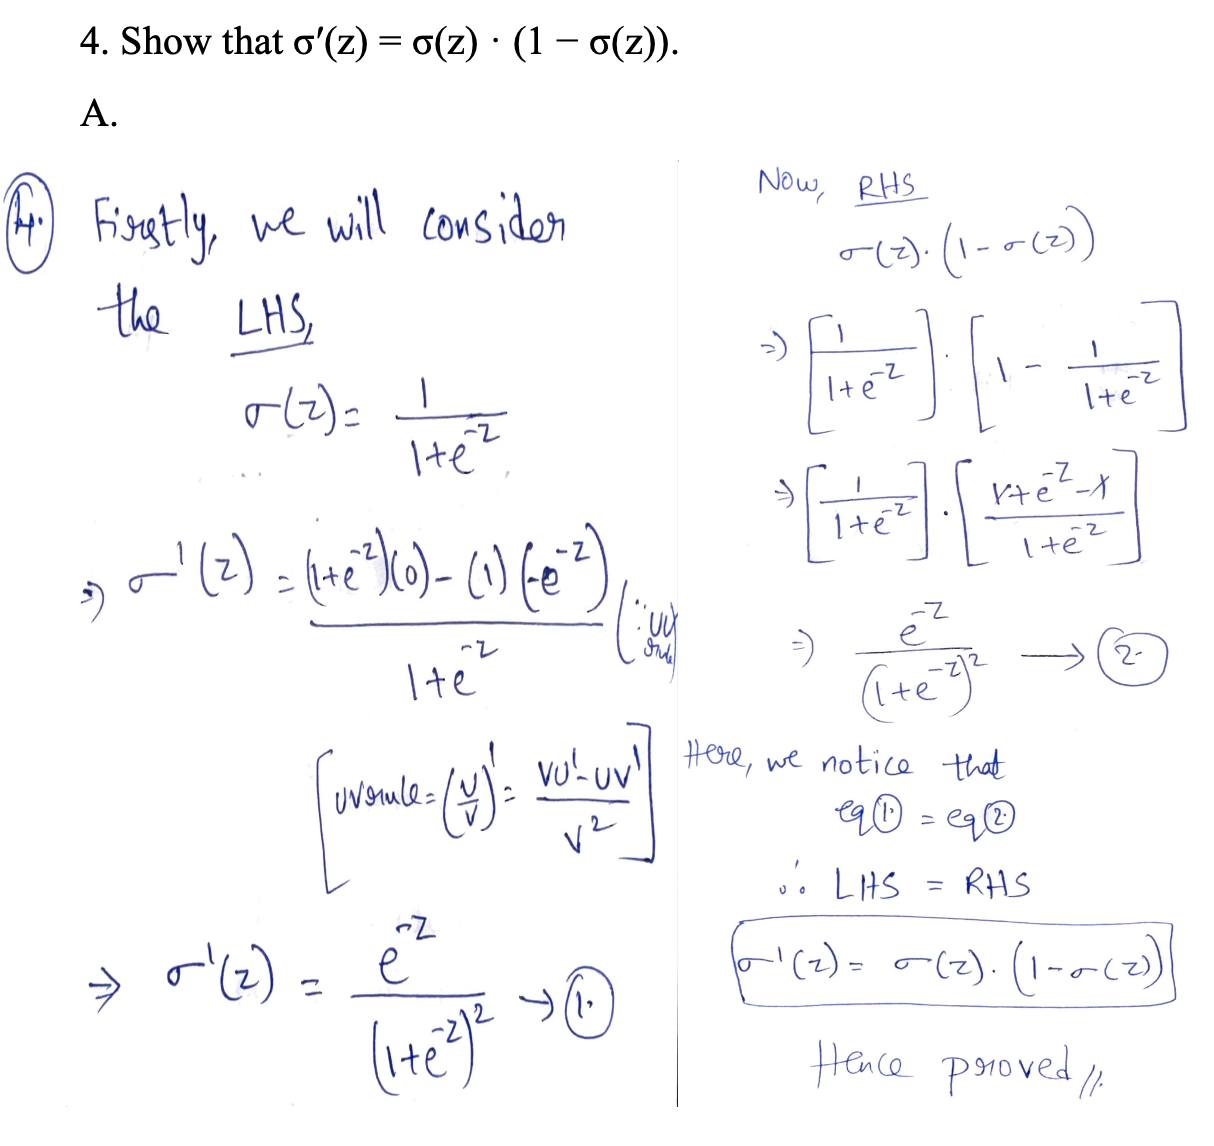

### Part 2:

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

import seaborn as sns
from mlxtend.plotting import plot_decision_regions

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [67]:
df = pd.read_csv('HR.csv')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [69]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [70]:
print(df['Department'].value_counts())
print()
print(df['salary'].value_counts())

Department
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64

salary
low       7316
medium    6446
high      1237
Name: count, dtype: int64


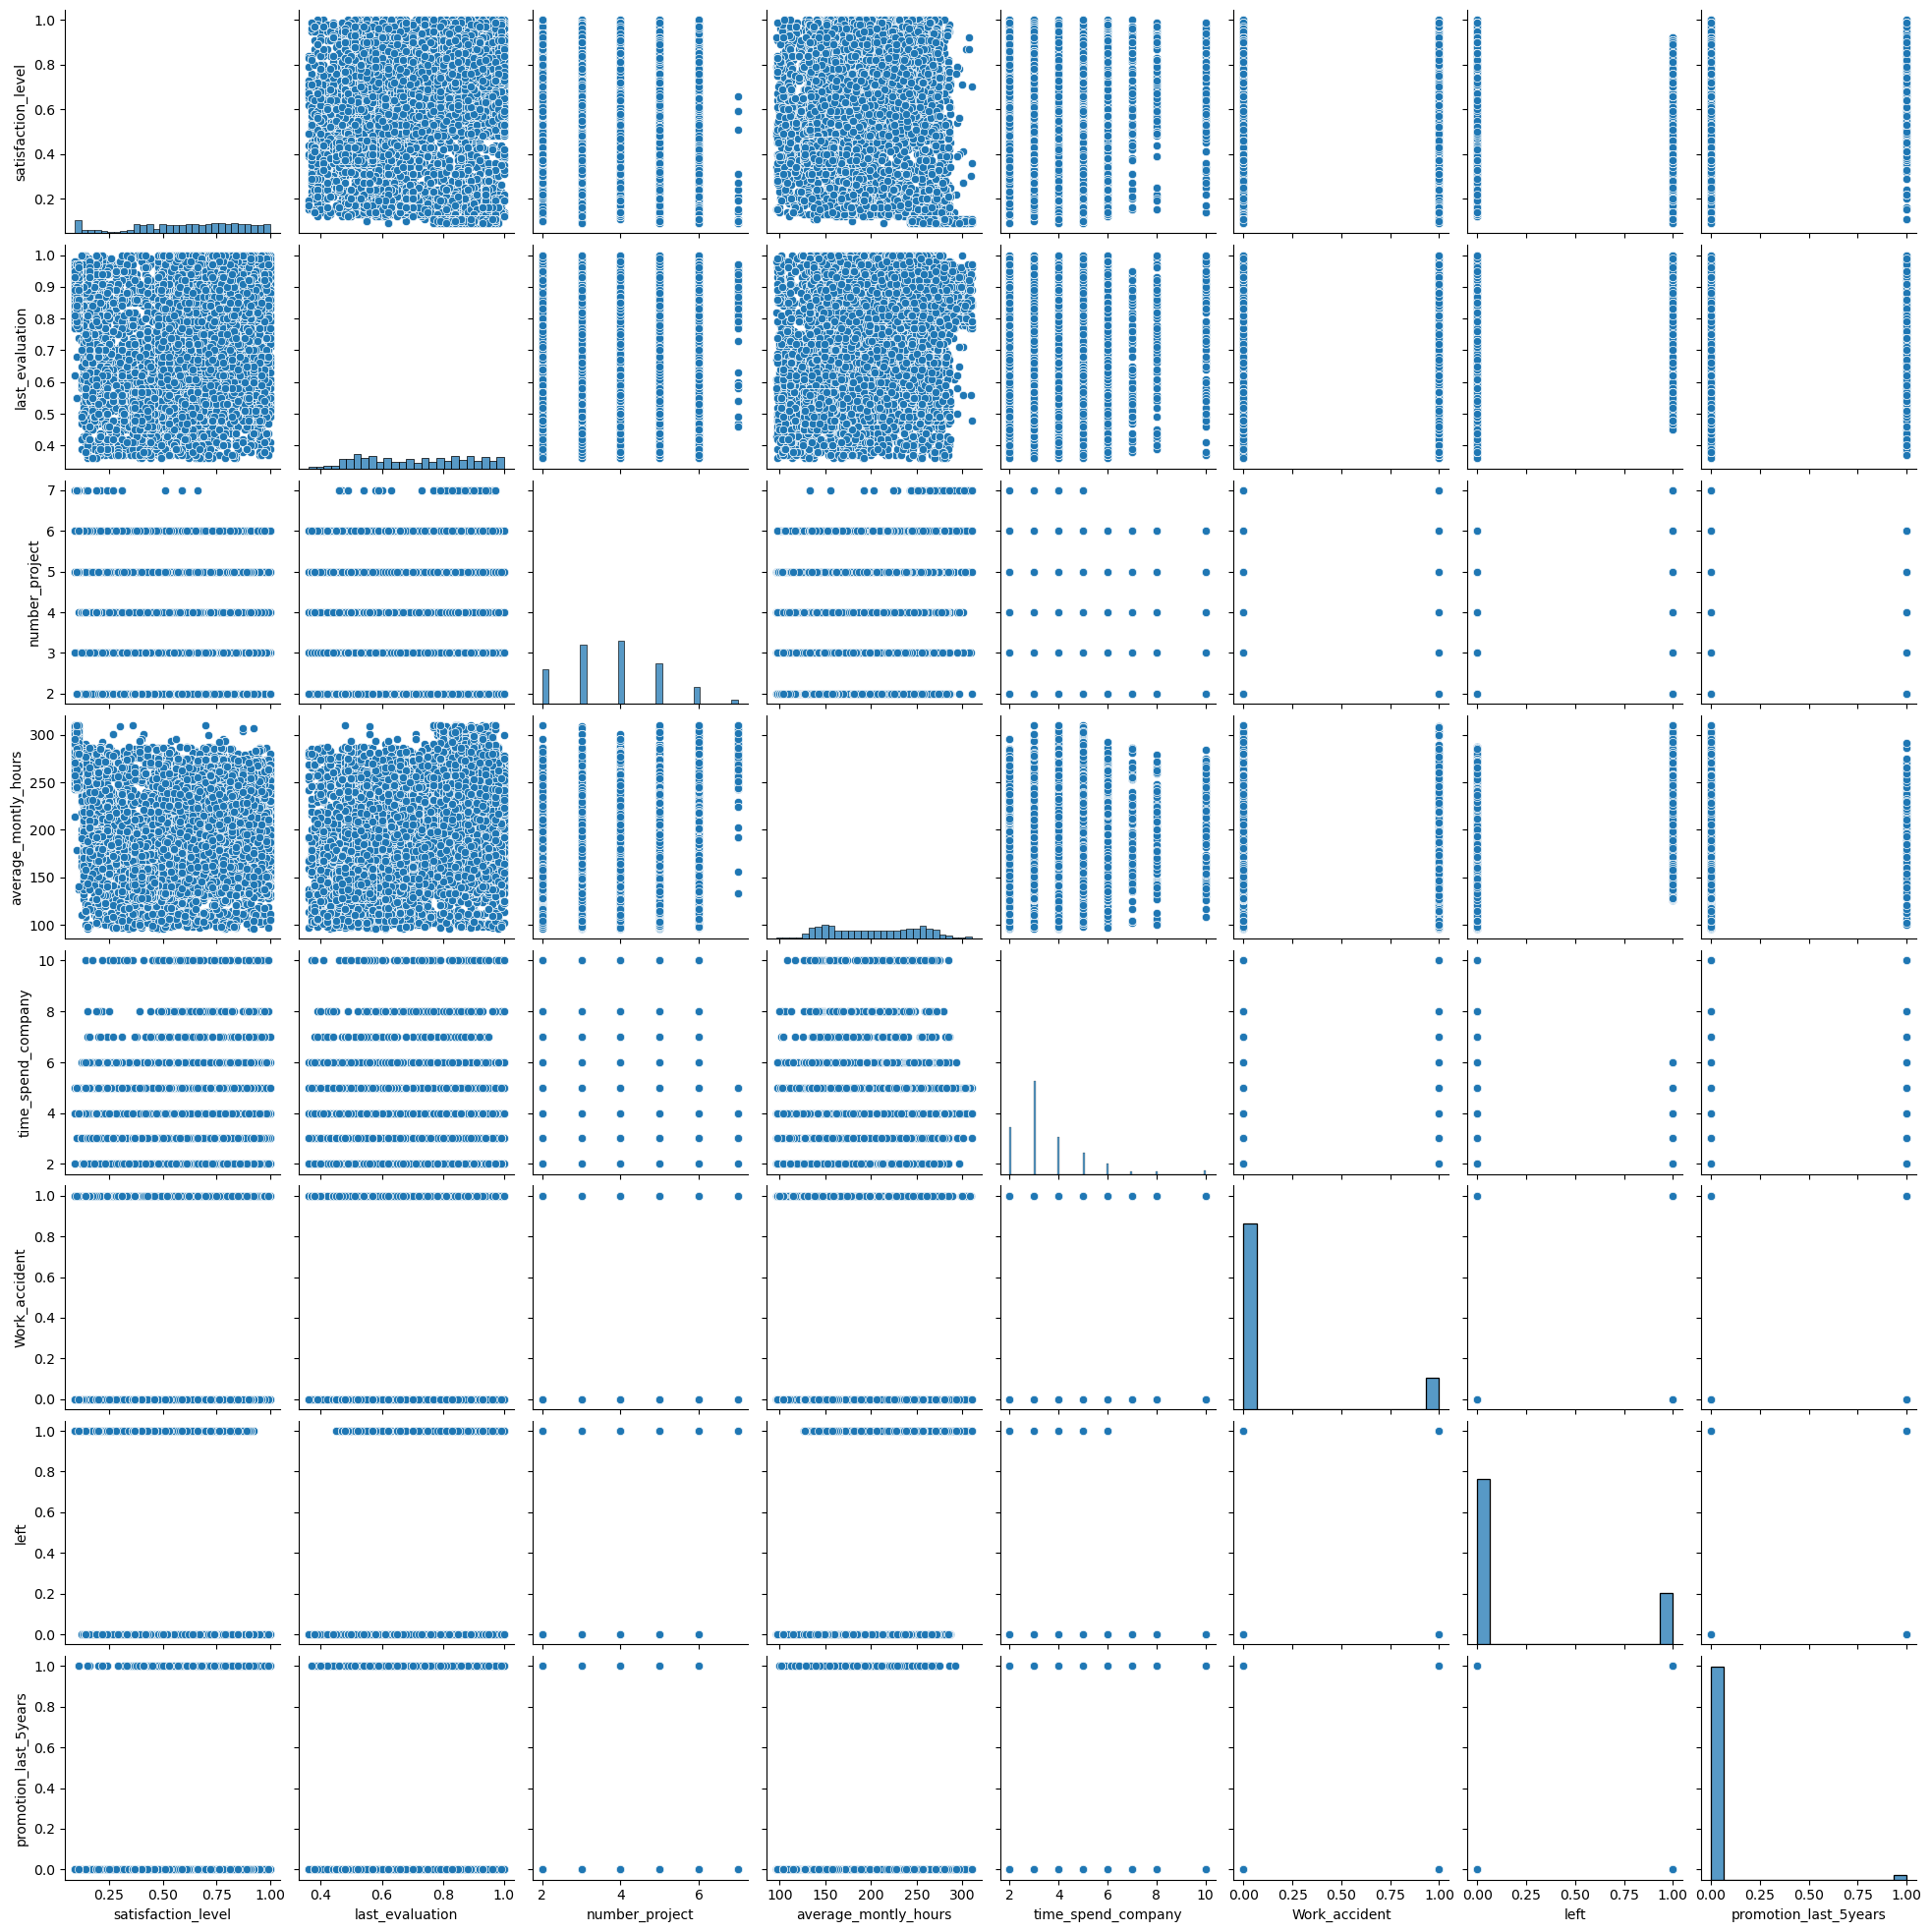

In [71]:
sns.pairplot(df) #relationship between each variables.

In [72]:
df = df[[col for col in df.columns if col not in {'Department', 'salary'}]] # remove "department" & "sales" columns to avoid data type error as they both belong to string.
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0
...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0
14995,0.37,0.48,2,160,3,0,1,0
14996,0.37,0.53,2,143,3,0,1,0
14997,0.11,0.96,6,280,4,0,1,0


In [73]:
df.cov() #tells about the direction relationship between variables.

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,0.061817,0.004469,-0.043814,-0.248945,-0.036618,0.005133,-0.041128,0.000919
last_evaluation,0.004469,0.029299,0.073703,2.904356,0.032888,-0.000428,0.000479,-0.000214
number_project,-0.043814,0.073703,1.519284,25.683271,0.354166,-0.002055,0.012488,-0.001078
average_montly_hours,-0.248945,2.904356,25.683271,2494.313175,9.316364,-0.178169,1.516419,-0.025541
time_spend_company,-0.036618,0.032888,0.354166,9.316364,2.131998,0.001089,0.090066,0.014206
Work_accident,0.005133,-0.000428,-0.002055,-0.178169,0.001089,0.123706,-0.023163,0.001992
left,-0.041128,0.000479,0.012488,1.516419,0.090066,-0.023163,0.181411,-0.003797
promotion_last_5years,0.000919,-0.000214,-0.001078,-0.025541,0.014206,0.001992,-0.003797,0.020817


In [74]:
df.corr() #tells about strength and direction relationship between variables.

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


<Axes: >

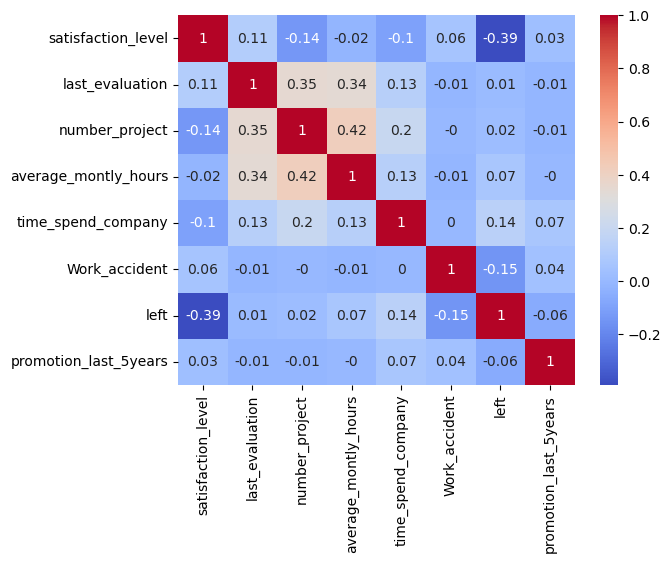

In [75]:
sns.heatmap(data=np.round(df.corr(), 2), annot=True, cmap="coolwarm")

In [76]:
scaler = MinMaxScaler()

X = df[[col for col in df.columns if col not in {
    'left', 
    'Department', 
    'salary', 
    #'last_evaluation', 
    #'number_project', 
    #'promotion_last_5years', 
    #'average_montly_hours', 
    #'time_spend_company', 
    #'Work_accident', 
    #'satisfaction_level',
}]]
y = df['left']
X = scaler.fit_transform(X) # rescale ((x-min)/(max-min))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # (testing data = 20%)

In [77]:
model = LogisticRegression().fit(X_train, y_train)

In [78]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

Text(0.5, 1.0, 'Train Confusion Matrix')

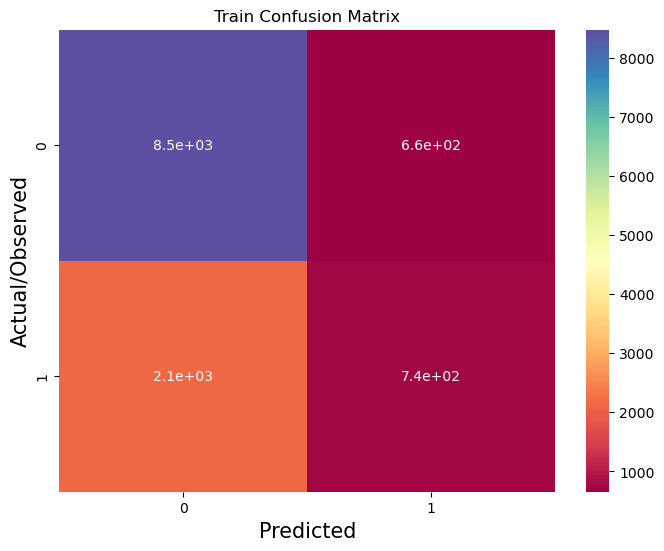

In [79]:
plt.figure(figsize = (8,6))

sns.heatmap(confusion_matrix(y_train, y_train_pred), 
            annot=True, # numerical representation 
            cmap="Spectral") # colour
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual/Observed', fontsize=15)
plt.title('Train Confusion Matrix')

Text(0.5, 1.0, 'Test Confusion Matrix')

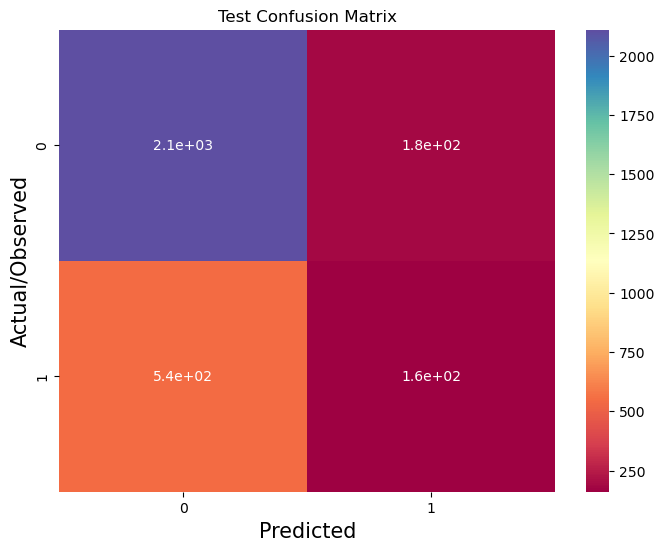

In [80]:
plt.figure(figsize = (8,6))

sns.heatmap(confusion_matrix(y_test, y_test_pred), 
            annot=True, 
            cmap="Spectral")
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual/Observed', fontsize=15)
plt.title('Test Confusion Matrix')

In [81]:
print('Train Classification Report\n')
print(classification_report(y_train, y_train_pred))

print('Test Classification Report\n')
print(classification_report(y_test, y_test_pred))

Train Classification Report

              precision    recall  f1-score   support

           0       0.80      0.93      0.86      9134
           1       0.53      0.26      0.35      2865

    accuracy                           0.77     11999
   macro avg       0.66      0.59      0.60     11999
weighted avg       0.74      0.77      0.74     11999

Test Classification Report

              precision    recall  f1-score   support

           0       0.79      0.92      0.85      2294
           1       0.47      0.23      0.31       706

    accuracy                           0.76      3000
   macro avg       0.63      0.57      0.58      3000
weighted avg       0.72      0.76      0.72      3000



In [82]:
model.score(X_train, y_train) # accuracy

0.7682306858904909

In [83]:
model.score(X_test, y_test)

0.7566666666666667

## Summary:

#### As we can observe that we got the accuracy of the training data set as 77% and the accuracy of test data as 76%. Based on this we can say that the model is working fine.